In [2]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys
import math

In [3]:
def check(k_clusters, max_iter, init_centroids):
  if (k_clusters < 0 or max_iter < 0 or (init_centroids != 'random' and init_centroids != 'in_pixels')):
    print("Invalid!")
    return False

In [4]:
def convert_image(img):
  raw_img = Image.open(img)
  img = np.array(raw_img)
  img_height, img_width, num_channels = img.shape
  img = img.reshape(img_height * img_width, num_channels)

  return img, img_height, img_width, num_channels

In [1]:
# Compare |A - B| < 0
def compare_label(A, B):
  for i in range(len(A)):
    c = A[i] - B[i]
    if c != 0:
      return False

In [5]:
# Init value of centroids
def init_value_centroids(img_1d, init_centroids, k_clusters):

  # Random case:
  if init_centroids == 'random':
    centroids = [np.random.randint(0, 255, 3) for _ in range(k_clusters)]

    # Check reapeat element
    while len(np.unique(centroids, axis = 0)) != k_clusters:
      centroids = [np.random.randint(0, 255, 3) for _ in range(k_clusters)]
  # Pixel case:
  elif init_centroids == 'in_pixels':
      filter_pixel = np.unique(img_1d, axis=0)

      # Check k_cluster
      if k_clusters > len(filter_pixel):
        k_clusters = len(filter_pixel)

      # Random index in filter_pixel
      random_index = np.random.choice(len(filter_pixel), k_clusters, replace = False)
      centroids = [filter_pixel[i] for i in random_index]

  return centroids, k_clusters

In [6]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
  if check(k_clusters, max_iter, init_centroids) == False:
    return None
  
  # init 2 result
  labels = [None for _ in range(len(img_1d))]
  centroids, k_clusters = init_value_centroids(img_1d, init_centroids, k_clusters)

  while max_iter:
    # Keep a previous labels version to compare
    labels_copy = labels

    clusters = [[] for _ in range(k_clusters)]

    # Travle all pixel
    for i in range(len(img_1d)):
      # get index has min value
      labels[i] = np.linalg.norm(centroids - img_1d[i], axis=1).argmin()
      clusters[labels[i]].append(i)

    # Check labels = labels_copy ?
    if compare_label(labels, labels_copy) == True:
      break

    # Calculate mean and travel pixel again
    for i in range(k_clusters):
      if clusters[i]:
        centroids[i] = np.mean([img_1d[k] for k in clusters[i]])

    max_iter -= 1

    return centroids, labels

In [7]:
# Compress image
def image_compress(img_1d, img_height, img_width, num_channels, centroids, labels):
  for i in range(len(img_1d)):
    img_1d[i] = centroids[labels[i]]

  img_1d = img_1d.reshape(img_height, img_width, num_channels)
  return img_1d

In [8]:
def show_img(out_img):

  # show image raw
  demo, axis = plt.subplots(1, 1, figsize = (12, 8))
  axis.imshow(out_img[0])
  axis.set_title('Raw_img')
  plt.tight_layout();
  
  # show image after random centroids
  demo, axis = plt.subplots(1, 3, figsize = (12, 8))
  plot_iter = 1
  for i,k in [(0,3),(1,5),(2,7)]:
    axis[i].set_title(f'C: pixels random from [0,255] | K = {k}')
    axis[i].imshow(out_img[plot_iter])
    plot_iter += 1
  plt.tight_layout();

  # show image after random in pixel centroids
  demo, axis = plt.subplots(1, 3, figsize = (12, 8))
  for i,k in [(0,3),(1,5),(2,7)]:
    axis[i].set_title(f'C: pixels random in img | K = {k}')
    axis[i].imshow(out_img[plot_iter])
    plot_iter += 1
  plt.tight_layout();

def test_kmeans():
  k_clusters = [3, 5, 7]
  init_centroids = ['random', 'in_pixels']
  max_iter = 1000
  out_img = []

  # Enter path name
  img = input("Enter path name of picutre: ")

  # Add img
  raw_img = Image.open(img)
  raw_img = np.array(raw_img)
  out_img.append(raw_img)

  for i in range(len(init_centroids)):
    for j in range(len(k_clusters)):
      img_1d, img_height, img_width, num_channels = convert_image(img)

      # Call kmean fucntion
      centroids, labels = kmeans(img_1d, k_clusters[j], max_iter, init_centroids[i])

      # Compress
      img_1d = image_compress(img_1d, img_height, img_width, num_channels, centroids, labels)

      # Add to arrray
      out_img.append(img_1d)

  # Show imgae
  show_img(out_img)

  im = Image.fromarray(out_img[1])
  im.save("your_file.jpeg")

  im = Image.fromarray(out_img[2], 'RGB')
  im.save("your_file.jpeg")

In [9]:
# test_kmeans()
# You can call this function to test without save picture 

Enter path name of picutre: oangiachungnha.png
Enter type of picture you want to save (jpg or png or pdf): jpg


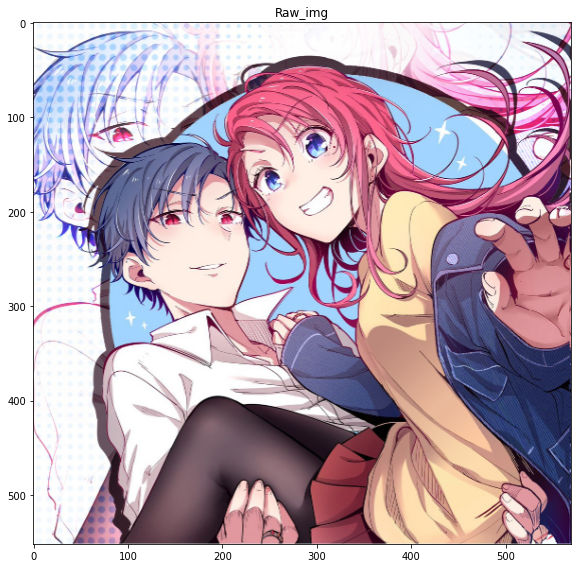

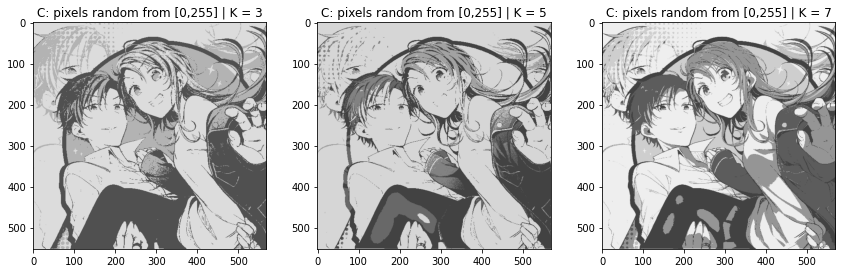

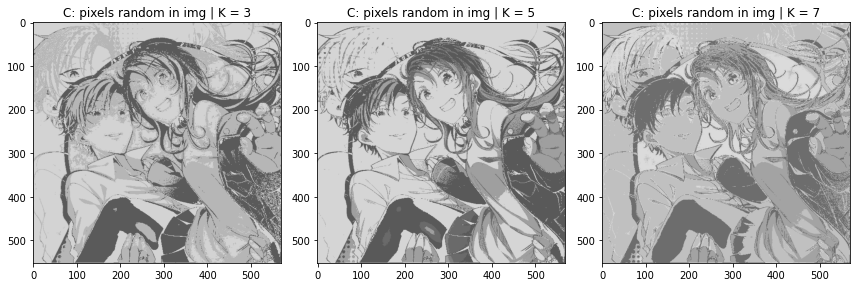

In [10]:
if __name__ == "__main__":
  k_clusters = [3, 5, 7]
  init_centroids = ['random', 'in_pixels']
  max_iter = 1000
  out_img = []

  # Enter path name
  img = input("Enter path name of picutre: ")

  # Add img
  raw_img = Image.open(img)
  raw_img = np.array(raw_img)
  out_img.append(raw_img)

  for i in range(len(init_centroids)):
    for j in range(len(k_clusters)):
      img_1d, img_height, img_width, num_channels = convert_image(img)

      # Call kmean fucntion
      centroids, labels = kmeans(img_1d, k_clusters[j], max_iter, init_centroids[i])

      # Compress
      img_1d = image_compress(img_1d, img_height, img_width, num_channels, centroids, labels)

      # Add to arrray
      out_img.append(img_1d)

  # Show imgae
  show_img(out_img)

  type = input("Enter type of picture you want to save (jpg or png or pdf): ")

  if type != 'png' and type != 'pdf' and type != 'jpg':
    print('Invalid type!')
  else:
    for i in range(len(out_img)):
      PIL.Image.fromarray(out_img[i], 'RGB').save(str(i) + '.' + type)
